   iPhone_XS  Galaxy_S10
1      95933      233176
2     552534     1833393
3     206712      374885
4     164379      228595
5      27834      127374
AxesSubplot(0.125,0.125;0.775x0.755)


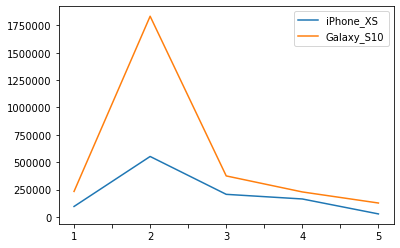

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Research:
    phone1_release_date=0
    phone2_release_date=0
    phone1_name=''
    phone2_name=''
    phone1_searchkeyword=''
    phone2_searchkeyword=''
    def __init__(self,_phone1_release_date,_phone2_release_date,_phone1_name,_phone2_name,_phone1_searchkeyword,_phone2_searchkeyword):
        self.phone1_release_date=_phone1_release_date
        self.phone2_release_date=_phone2_release_date
        self.phone1_name=_phone1_name
        self.phone2_name=_phone2_name
        self.phone1_searchkeyword=_phone1_searchkeyword
        self.phone2_searchkeyword=_phone2_searchkeyword
    def visualization(self):
       
        i=0
        data=pd.DataFrame(0,columns=[self.phone1_name,self.phone2_name],index=['1','2','3','4','5'])
        aa=0
        dateafter1=self.phone1_release_date+4
        dateafter2=self.phone2_release_date+4
        while (self.phone1_release_date <=dateafter1 ) :

                link = 'https://m.news.naver.com/rankingList.nhn?sid1=105&date='
                s1=link+str(self.phone1_release_date)
                html=urlopen(s1)
                soup=BeautifulSoup(html,"html.parser")
                ul=soup.find("ul",{"class":"commonlist"})
                lists=ul.findAll("li")
                i=0
                
                sum=0

                while i<=30:
                    link=soup.select("#ct > div.ranking_news > ul > li:nth-child("+str(i)+") > a")

                    for li in link:              

                        preview=li.text.strip().split('조회수')
                        if preview[0].find(self.phone1_searchkeyword)!= -1:
                            #print(preview[0])     

                            sum+=int(preview[1].replace(',',''))
                           # print(preview[1].replace(',',''))
                           # print('TOP NEWS 조회수의 합:',sum)
                    i+=1
                self.phone1_release_date+=1
                aa+=1
                data.loc[str(aa),self.phone1_name]=sum


        
        i=0

        aa=0
        while (self.phone2_release_date <= dateafter2) :

                link = 'https://m.news.naver.com/rankingList.nhn?sid1=105&date='
                s2=link+str(self.phone2_release_date)
                html=urlopen(s2)
                soup=BeautifulSoup(html,"html.parser")
                ul=soup.find("ul",{"class":"commonlist"})
                lists=ul.findAll("li")
                i=0
              
                sum=0

                while i<=30:
                    link=soup.select("#ct > div.ranking_news > ul > li:nth-child("+str(i)+") > a")

                    for li in link:              

                        preview=li.text.strip().split('조회수')
                        if preview[0].find(self.phone2_searchkeyword)!= -1:
                          #  print(preview[0])

                            sum+=int(preview[1].replace(',',''))
                           # print(preview[1].replace(',',''))
                          #  print('TOP NEWS 조회수의 합:',sum)
                    i+=1
                self.phone2_release_date+=1
                aa+=1
                data.loc[str(aa),self.phone2_name]=sum

        print(data)
        print(data.plot.line())

         #아이폰XS 발표일,갤럭시s10 발표일(한국시간),핸드폰1 이름, 핸드폰2 이름, 핸드폰1 검색 키워드, 핸드폰2 검색 키워드
iPhone_XS_VS_Galaxy_S10=Research(20180912,20190220,'iPhone_XS','Galaxy_S10','아이폰','갤럭시')
iPhone_XS_VS_Galaxy_S10.visualization()